# Boxumrandung mit 2017 facebook/detr-resnet-50


DEtection TRansformer (DETR) model trained  on COCO (Common Objects in Context) 2017 object detection  images (118k annotated images, 80 categories).


Prompt für Copilot:
Erstelle ein skript zur Objekterkennung eines bildes mit umrandung mit einem pretrained modell von hugging face. Gebe das Bild mit Umrandungen der erkannten Objekte aus und schreibe an diese Umrandungen die vorhergesagte Klasse mit textsize 50. Als Liste gebe die Namen der Klassen mit den Koordinaten der Umrandlungspolyons aus. Als Testbild benutze Autos_4_überdeckt.png. Extrahiere die Labels direkt aus dem Modell.


Das Testbild wurde auch mit Copilot generiert.

In [ ]:
import warnings
warnings.filterwarnings("ignore")

Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Bounding Boxes and Classes: [('car', [297.78, 405.61, 710.0, 667.3]), ('car', [1.81, 396.17, 499.93, 636.82]), ('car', [568.74, 375.02, 1116.22, 689.26]), ('car', [993.38, 325.29, 1534.5, 729.98])]


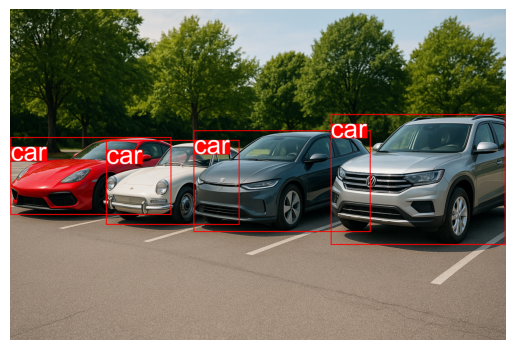

In [14]:
# generiert mit Copilot

import torch
from transformers import DetrImageProcessor, DetrForObjectDetection
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt

# Lade das vortrainierte Modell und den Prozessor
model_name = "facebook/detr-resnet-50"
processor = DetrImageProcessor.from_pretrained(model_name)
model = DetrForObjectDetection.from_pretrained(model_name)

# Lade das Bild
image_path = "Autos_4_überdeckt.png"
image = Image.open(image_path)

# Verarbeite das Bild
inputs = processor(images=image, return_tensors="pt")
outputs = model(**inputs)

# Extrahiere die Ergebnisse
target_sizes = torch.tensor([image.size[::-1]])
results = processor.post_process_object_detection(outputs, target_sizes=target_sizes)[0]

# Zeichne die Umrandungen, beschrifte sie und speichere die Koordinaten
draw = ImageDraw.Draw(image)
font = ImageFont.truetype("arial.ttf", 80)  # Setze die Schriftgröße auf 12 Punkte
bounding_boxes = []

# Klassenbezeichnungen aus dem Modell
labels = model.config.id2label

for score, label_id, box in zip(results["scores"], results["labels"], results["boxes"]):
    if score > 0.5:  # Filtere nach einer Mindestvertrauenswürdigkeit
        box = [round(i, 2) for i in box.tolist()]
        label = labels[label_id.item()]
        bounding_boxes.append((label, box))
        draw.rectangle(box, outline="red", width=3)
        text_bbox = draw.textbbox((box[0], box[1]), label, font=font)
        draw.rectangle([text_bbox[0], text_bbox[1], text_bbox[2], text_bbox[3]], fill="red")
        draw.text((box[0], box[1]), label, fill="white", font=font)

# Speichere das Bild mit Umrandungen und Beschriftungen
image.save("output_image_with_boxes_and_labels.jpg")

# Gib die Namen der Klassen und die Koordinaten der Umrandungspolygone aus
print("Bounding Boxes and Classes:", bounding_boxes)

# Zeige das Bild an
plt.imshow(image)
plt.axis('off')
plt.show()



